<a href="https://colab.research.google.com/github/kamian-chris/20241224-AI/blob/main/2025_02_04_%E5%80%8B%E4%BA%BA%E5%B0%88%E9%A1%8C%E7%94%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```python
個人專題 - 阿茲海默症預測資料集(全球)分析

資料描述、來源:

簡述：這是一份集包含來自 20 個國家的 74,283 筆記錄，為了解阿茲海默症的風險因素提供了見解。它包括人口統計、生活方式、醫療和遺傳變量，具有偏差分佈，以反映不同地區之間現實的差異。

用途：此資料集可用於阿茲海默症的預測模型、流行病學研究和醫療保健研究。
   目前僅用於個人練習分析。

資料來源：
https://www.kaggle.com/datasets/ankushpanday1/alzheimers-prediction-dataset-global


重要欄位說明：

Country 國家
Age 年齡
Gender  性別
Education Level 教育程度
BMI 身體質量指數
Physical Activity Level 身體活動水平
Smoking Status  吸菸狀況
Alcohol Consumption 飲酒習慣
Diabetes  糖尿病
Hypertension  高血壓
Cholesterol Level 膽固醇水平
Family History of Alzheimer’s 阿茲海默症家族病史
Cognitive Test Score  認知測試分數
Depression Level  憂鬱程度
Sleep Quality 睡眠品質
Dietary Habits  飲食習慣
Air Pollution Exposure  空氣污染暴露程度
Employment Status 就業狀況
Marital Status  婚姻狀況
Genetic Risk Factor (APOE-ε4 allele)  遺傳風險因素（APOE-ε4 等位基因）
Social Engagement Level 社交參與程
Income Level  收入水平
Stress Levels 壓力水平
Urban vs Rural Living 城市或鄉村居住
Alzheimer’s Diagnosis 阿茲海默症診斷

使用工具：
python
PowerPoint

分析圖表：

見下圖。

圖表解釋：

見下圖。

結論：

見下圖。

```

In [ ]:
# kagglehub 下載檔案用

import kagglehub

# Download latest version
path = kagglehub.dataset_download("ankushpanday1/alzheimers-prediction-dataset-global")

print("Path to dataset files:", path)

In [33]:
# 掛載 google雲端硬碟用

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
# import 用

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/homework_data/alzheimers_prediction_dataset.csv")
# data.head(10)

In [ ]:
# 初步檢查資料數量用

data.shape

(74283, 25)

In [ ]:
# 初步檢查資訊用 -> 無缺失值

data.info()

```python
第一步：先嘗試分析是否有與阿茲海默症直接相關的資料

```

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


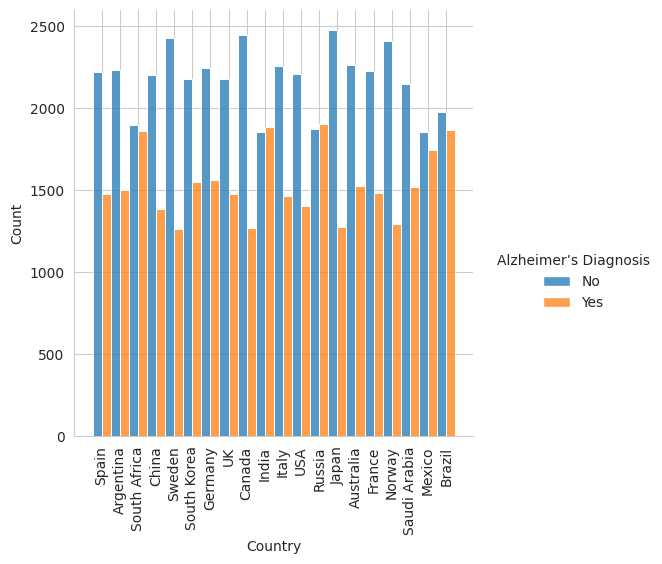

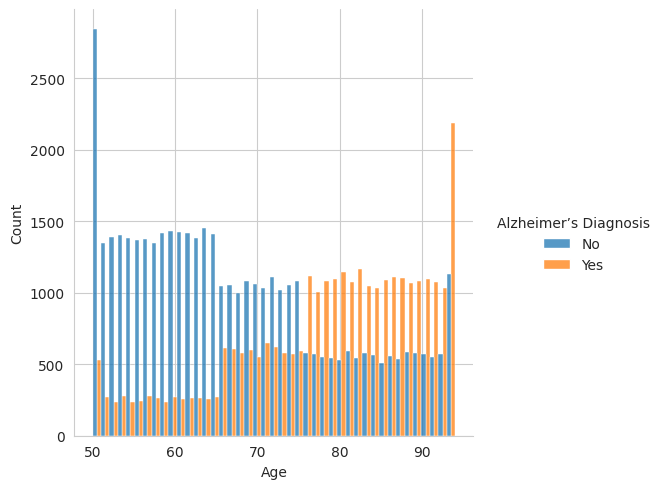

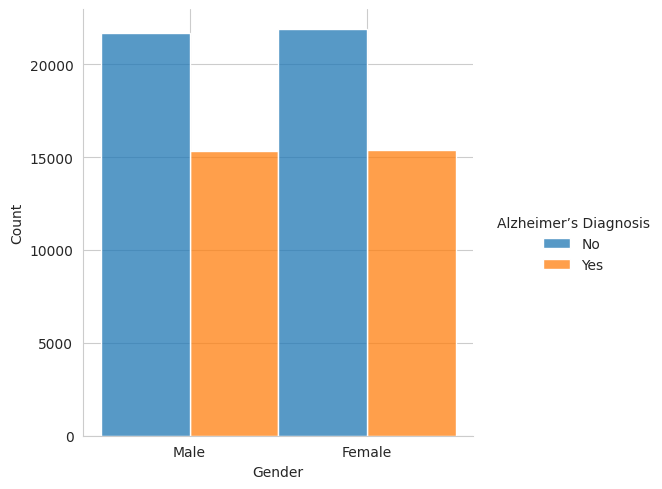

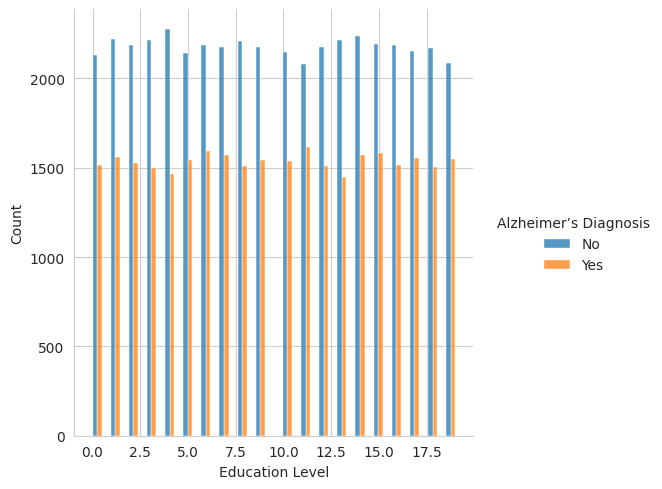

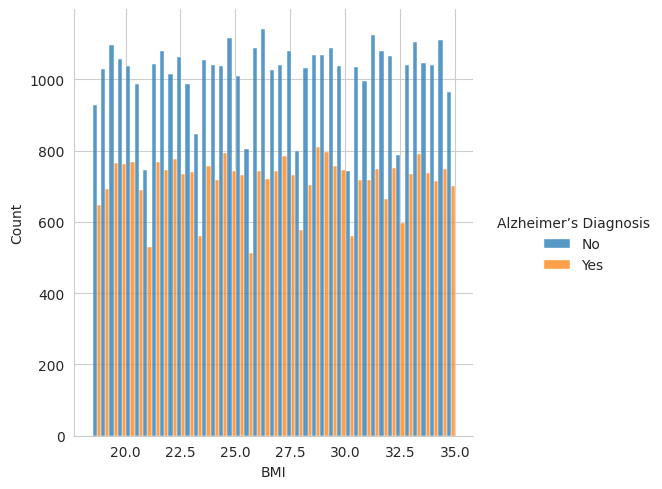

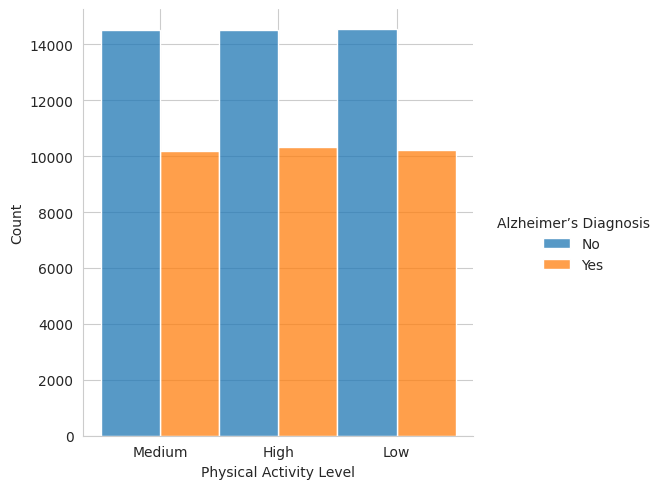

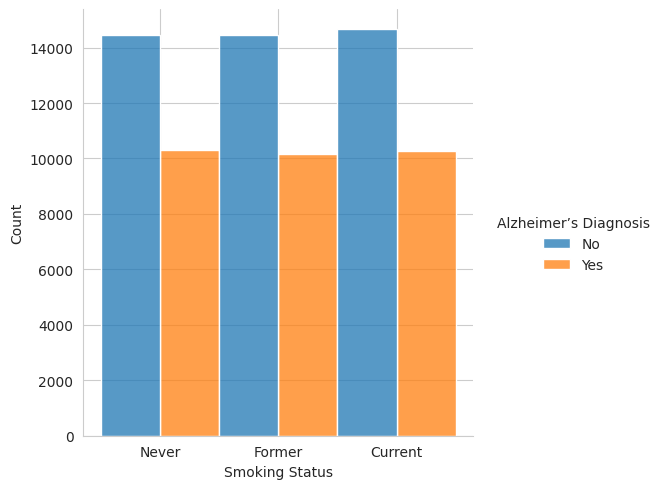

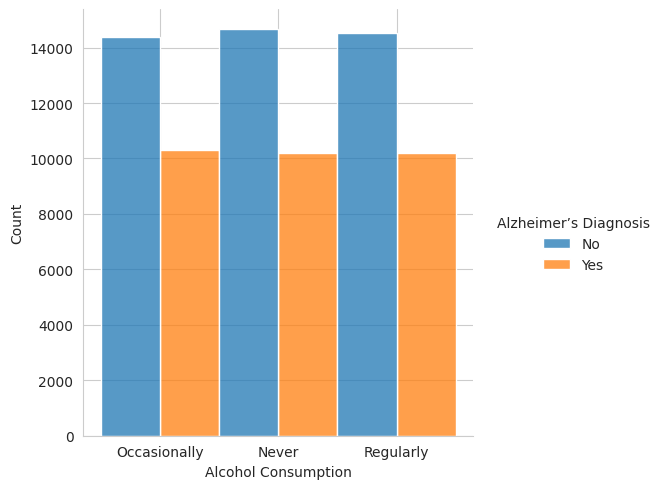

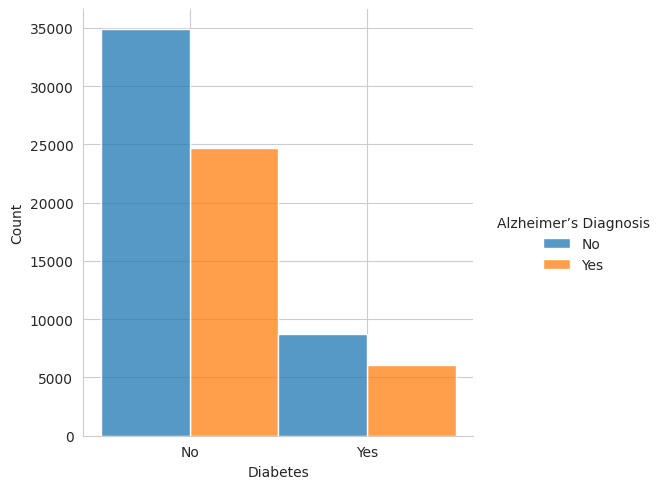

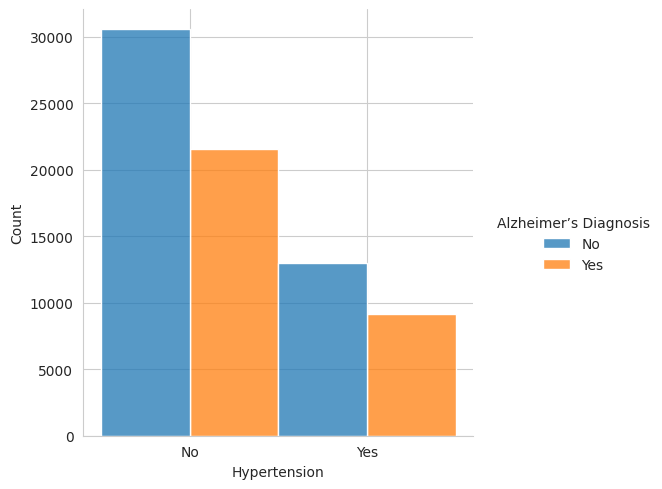

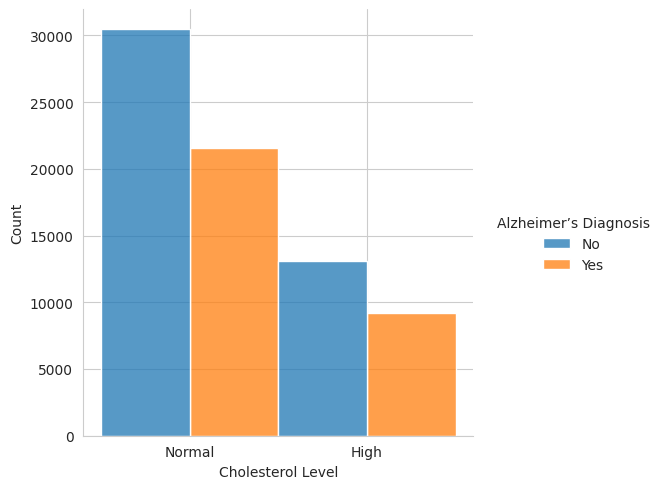

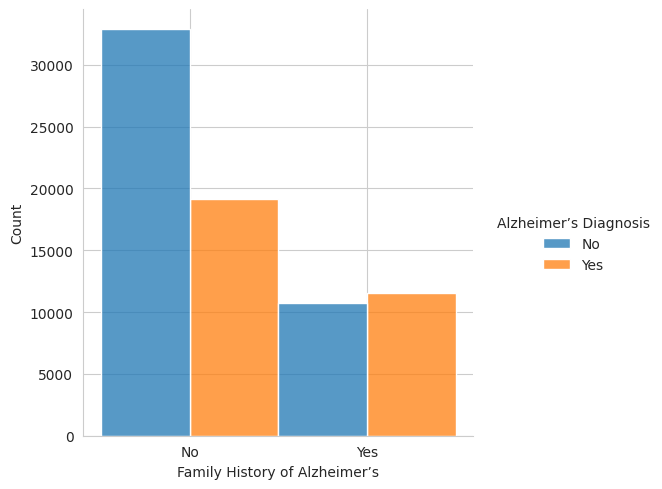

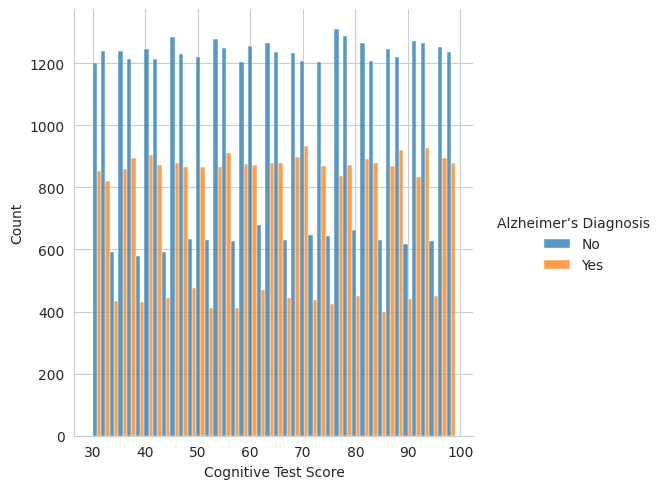

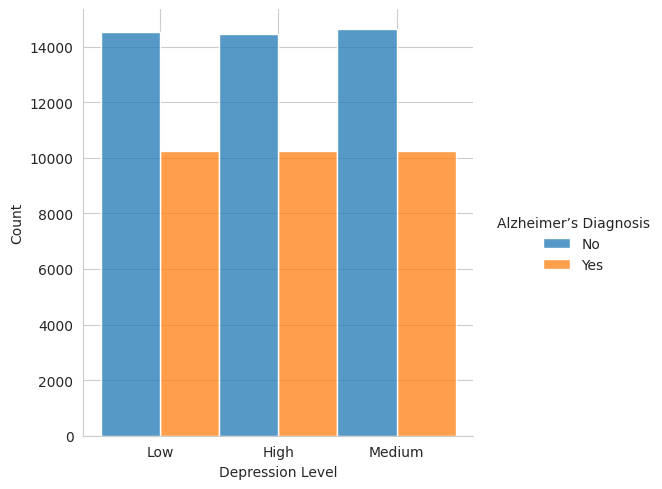

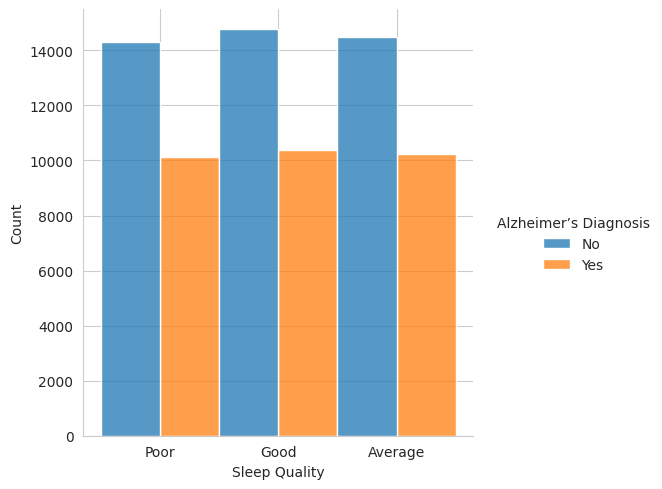

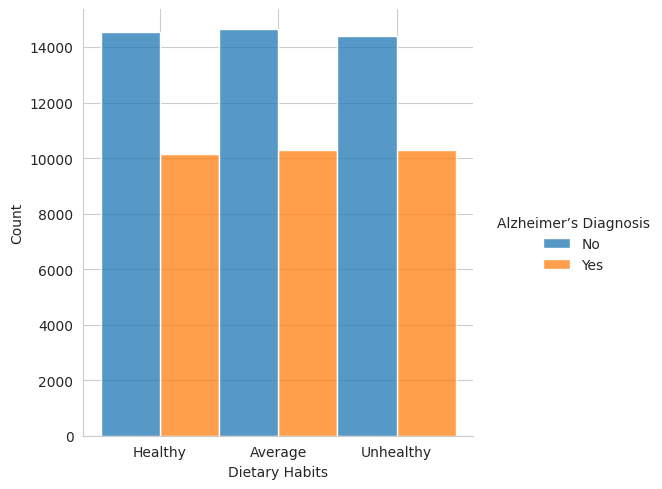

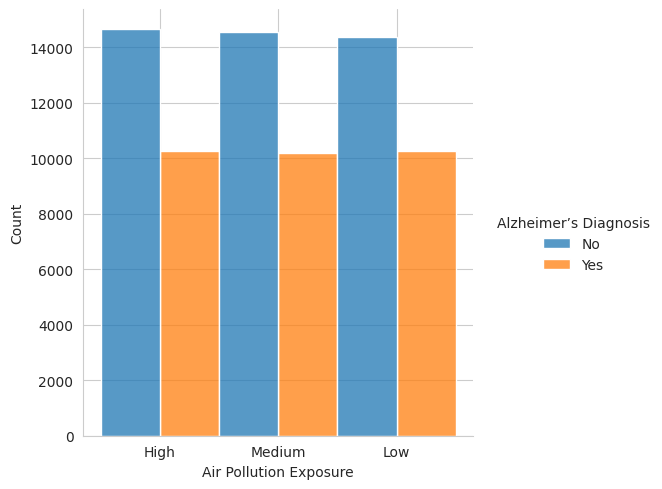

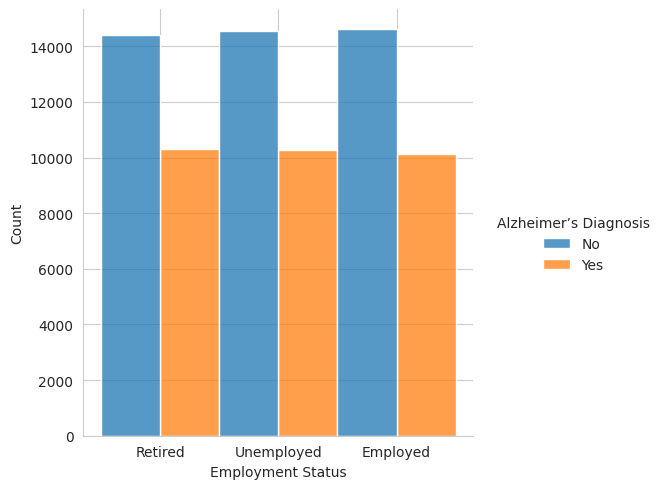

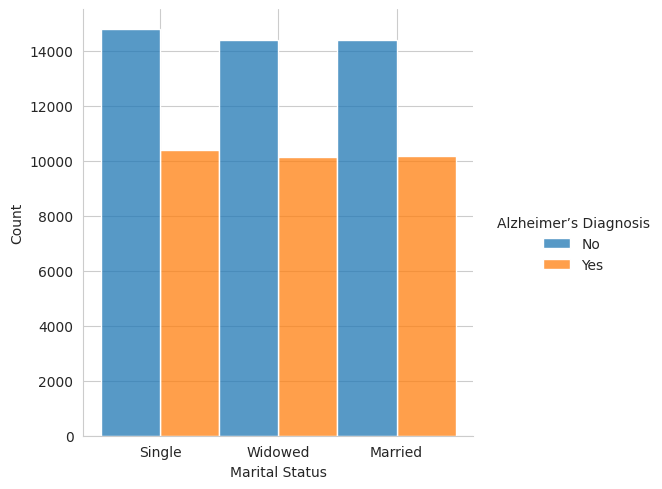

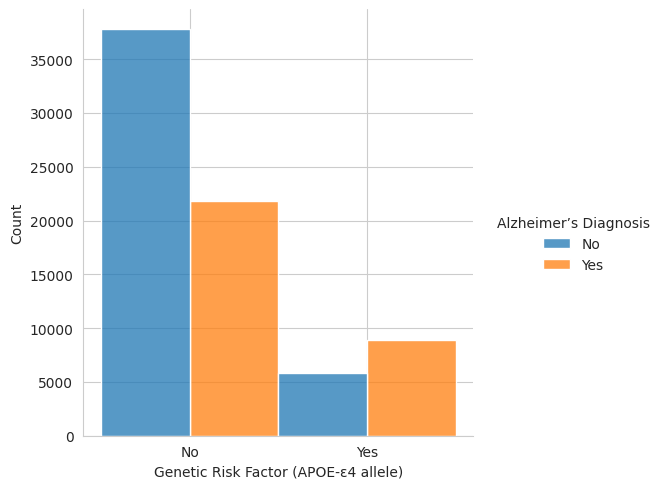

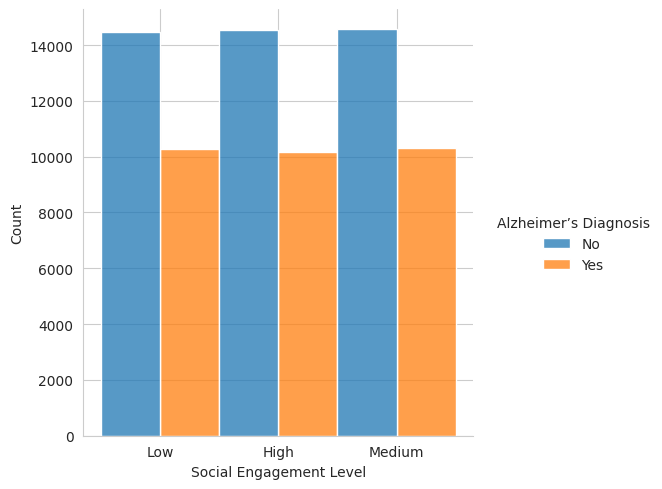

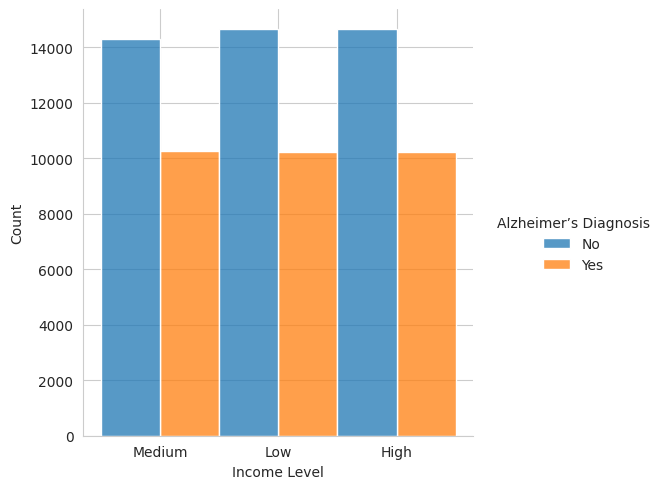

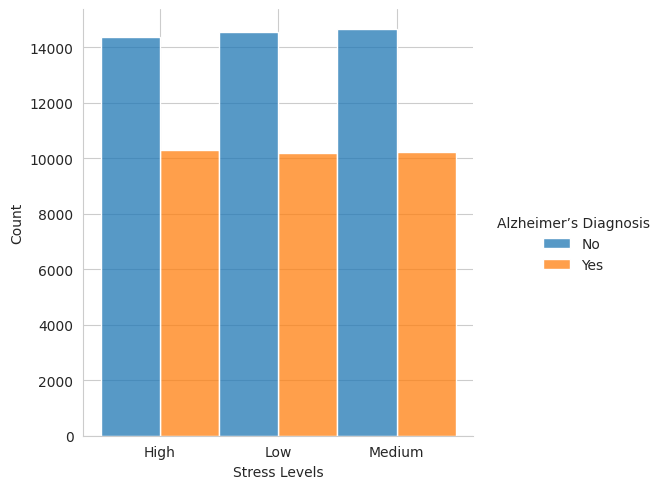

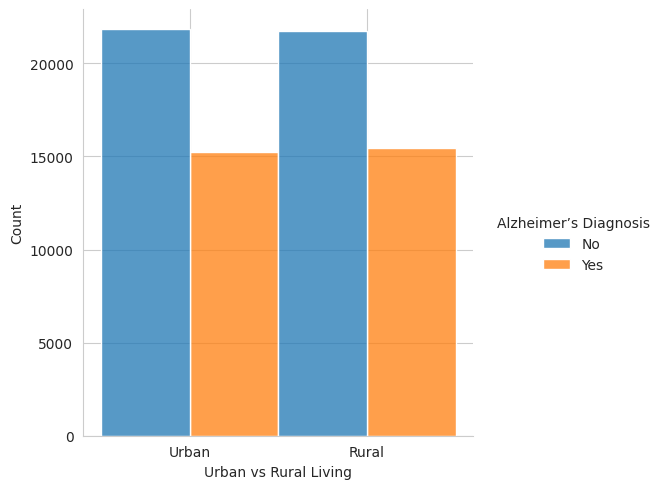

In [6]:
# 初步分析用(使用 sns.displot)

sns.displot(data, x='Country', hue='Alzheimer’s Diagnosis', multiple="dodge")
plt.xticks(rotation=90)
sns.displot(data, x='Age', hue='Alzheimer’s Diagnosis', multiple="dodge")
sns.displot(data, x='Gender', hue='Alzheimer’s Diagnosis', multiple="dodge")
sns.displot(data, x='Education Level', hue='Alzheimer’s Diagnosis', multiple="dodge")
sns.displot(data, x='BMI', hue='Alzheimer’s Diagnosis', multiple="dodge")
sns.displot(data, x='Physical Activity Level', hue='Alzheimer’s Diagnosis', multiple="dodge")
sns.displot(data, x='Smoking Status', hue='Alzheimer’s Diagnosis', multiple="dodge")
sns.displot(data, x='Alcohol Consumption', hue='Alzheimer’s Diagnosis', multiple="dodge")
sns.displot(data, x='Diabetes', hue='Alzheimer’s Diagnosis', multiple="dodge")
sns.displot(data, x='Hypertension', hue='Alzheimer’s Diagnosis', multiple="dodge")
sns.displot(data, x='Cholesterol Level', hue='Alzheimer’s Diagnosis', multiple="dodge")
sns.displot(data, x='Family History of Alzheimer’s', hue='Alzheimer’s Diagnosis', multiple="dodge")
sns.displot(data, x='Cognitive Test Score', hue='Alzheimer’s Diagnosis', multiple="dodge")
sns.displot(data, x='Depression Level', hue='Alzheimer’s Diagnosis', multiple="dodge")
sns.displot(data, x='Sleep Quality', hue='Alzheimer’s Diagnosis', multiple="dodge")
sns.displot(data, x='Dietary Habits', hue='Alzheimer’s Diagnosis', multiple="dodge")
sns.displot(data, x='Air Pollution Exposure', hue='Alzheimer’s Diagnosis', multiple="dodge")
sns.displot(data, x='Employment Status', hue='Alzheimer’s Diagnosis', multiple="dodge")
sns.displot(data, x='Marital Status', hue='Alzheimer’s Diagnosis', multiple="dodge")
sns.displot(data, x='Genetic Risk Factor (APOE-ε4 allele)', hue='Alzheimer’s Diagnosis', multiple="dodge")
sns.displot(data, x='Social Engagement Level', hue='Alzheimer’s Diagnosis', multiple="dodge")
sns.displot(data, x='Income Level', hue='Alzheimer’s Diagnosis', multiple="dodge")
sns.displot(data, x='Stress Levels', hue='Alzheimer’s Diagnosis', multiple="dodge")
sns.displot(data, x='Urban vs Rural Living', hue='Alzheimer’s Diagnosis', multiple="dodge")

plt.show()

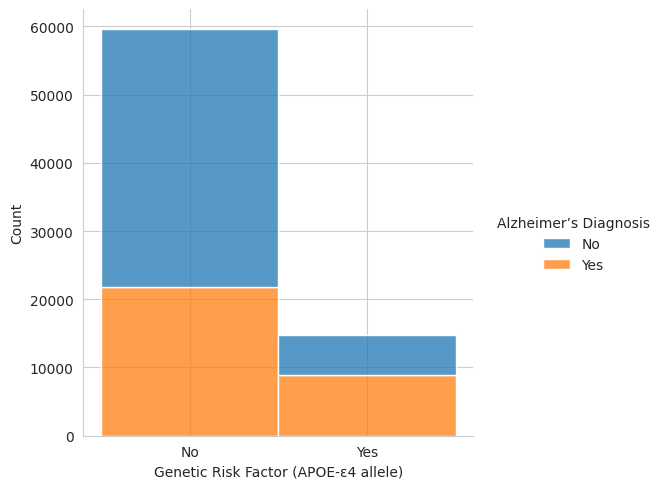

In [19]:
sns.displot(data, x='Genetic Risk Factor (APOE-ε4 allele)', hue='Alzheimer’s Diagnosis', multiple="stack")

Axes(0.125,0.11;0.62x0.77)


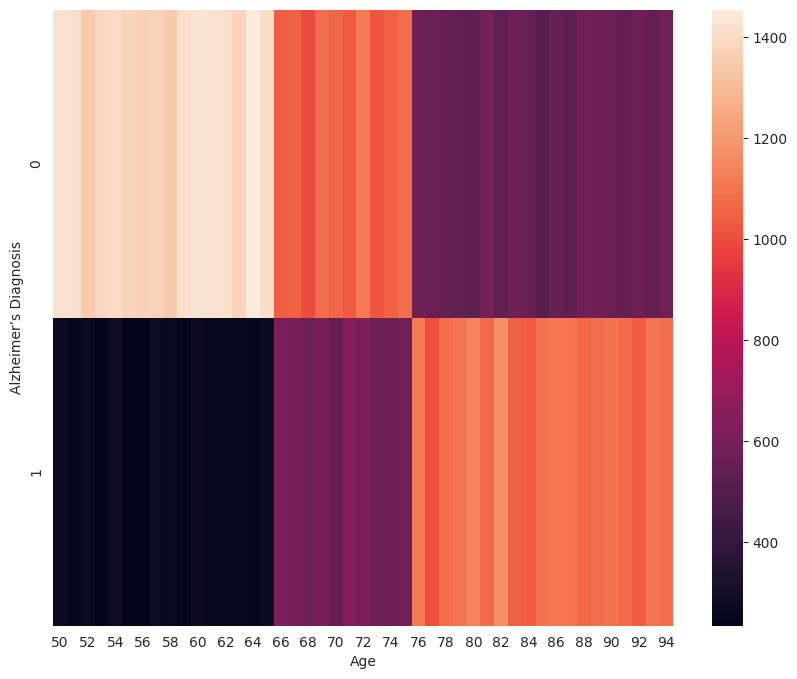

In [47]:
plt.figure(figsize=(10, 8))
n2 = data.groupby(['Alzheimer’s Diagnosis','Age']).size().unstack(fill_value=0)
print(sns.heatmap(n2))

**結論一：無法初看與是否得有阿茲海默症的關鍵相關性**

```python
第二步：初步處理資料：
        1.想依據相關性分組
        2.因此需要將部分欄位數值化

```

In [ ]:
# 把 Age 依照先前的 65 75 來做分別

# 取出 'Age' 欄位
data_age = data["Age"]

for i in data_age.index:
    if data_age[i] <= 65:
        data_age[i] = 0
    elif data_age[i] <= 75:
        data_age[i] = 1
    else:
        data_age[i] = 2

# 把修改後的數據賦回原 DataFrame
data["Age"] = data_age

In [ ]:
# 檢查

data["Age"].value_counts()

In [50]:
# 數值轉化用

data["Physical Activity Level"] = data["Physical Activity Level"].replace({"High": 0, "Medium": 1, "Low": 2})
data["Smoking Status"] = data["Smoking Status"].replace({"Current": 2, "Former": 1, "Never": 0})
data["Alcohol Consumption"] = data["Alcohol Consumption"].replace({"Regularly": 2, "Occasionally": 1, "Never": 0})
data["Diabetes"] = data["Diabetes"].replace({"Yes": 1, "No": 0})
data["Hypertension"] = data["Hypertension"].replace({"Yes": 1, "No": 0})
data["Cholesterol Level"] = data["Cholesterol Level"].replace({"High": 1, "Normal": 0})
data["Family History of Alzheimer’s"] = data["Family History of Alzheimer’s"].replace({"Yes": 1, "No": 0})
data["Depression Level"] = data["Depression Level"].replace({"High": 2, "Medium": 1, "Low": 0})
data["Sleep Quality"] = data["Sleep Quality"].replace({"Good": 0, "Average": 1, "Poor": 2})
data["Dietary Habits"] = data["Dietary Habits"].replace({"Healthy": 0, "Average": 1, "Unhealthy": 2})
data["Air Pollution Exposure"] = data["Air Pollution Exposure"].replace({"High": 2, "Medium": 1, "Low": 0})
data["Genetic Risk Factor (APOE-ε4 allele)"] = data["Genetic Risk Factor (APOE-ε4 allele)"].replace({"Yes": 1, "No": 0})
data["Stress Levels"] = data["Stress Levels"].replace({"High": 2, "Medium": 1, "Low": 0})
data["Alzheimer’s Diagnosis"] = data["Alzheimer’s Diagnosis"].replace({"Yes": 1, "No": 0})

In [4]:
# 查看欄位內容用

data['Dietary Habits'].value_counts().index

Index(['Average', 'Healthy', 'Unhealthy'], dtype='object', name='Dietary Habits')

In [ ]:
# 檢查相關性係數用

print("相關性係數=", data['Hypertension'].corr(data['Diabetes']))
print("相關性係數矩陣=", data[['Alcohol Consumption','Smoking Status']].corr())

In [ ]:
# 這一段用來確認每個被數值化的欄位彼此間的相關性係數

di_list = data.columns

for index_2 in di_list:
    d2 = data[index_2]
    for index_1 in di_list:
      d1 = data[index_1]
      try:
        if d1.corr(d2) >= 0.4:
            print(index_1, "&", index_2, ":", d1.corr(d2))
      # 捕捉錯誤，避免崩潰
      except ValueError:
        pass

**結論二：從初始資料來看，彼此單獨資料基本沒有任何相關性**

**只有 Alzheimer’s Diagnosis & Age : 0.4199226502179286 -> 所以要生出新欄位了**

```python
第三步：生成新的欄位以便分析：
        1.希望透過直覺來分組
        2.希望透過數值化後的資料，來分析是否可以依據分數高低來判斷得症機率高低

```

In [52]:
# 健康狀況(health_score)：糖尿病、高血壓、膽固醇、憂鬱程度
data["health_score"] = (
    data["Diabetes"] +
    data["Hypertension"] +
    data["Cholesterol Level"] +
    data["Depression Level"]
)

# 生活習慣(lifestyle_score)：身體活動水平、吸菸、飲酒、飲食狀況、睡眠、壓力
data["lifestyle_score"] = (
    data["Physical Activity Level"] +
    data["Smoking Status"] +
    data["Alcohol Consumption"] +
    data["Dietary Habits"] +
    data["Sleep Quality"] +
    data["Stress Levels"]
)

# 計算環境因素分數(environment_score)：空氣污染
data["environment_score"] = data["Air Pollution Exposure"]

# 計算遺傳風險分數(genetic_score)：家族病史、基因風險
data["genetic_score"] = (
    data["Family History of Alzheimer’s"] +
    data["Genetic Risk Factor (APOE-ε4 allele)"]
)

# 計算總風險分數
data["total_risk_score"] = (
    data["health_score"] +
    data["lifestyle_score"] +
    data["environment_score"] +
    data["genetic_score"] +
    data["Age"]
)


<Figure size 800x600 with 0 Axes>

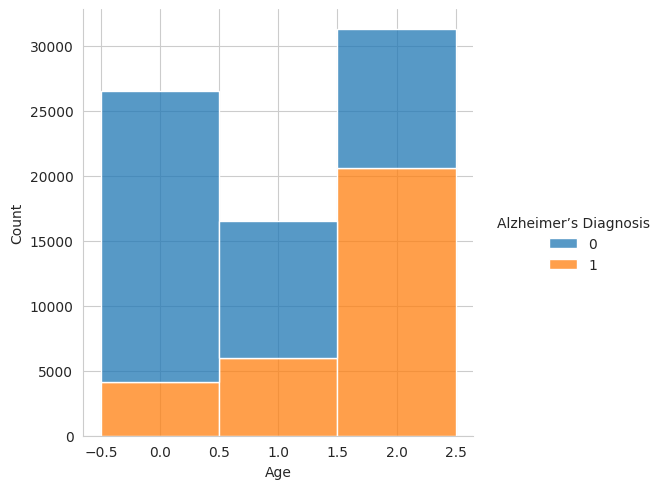

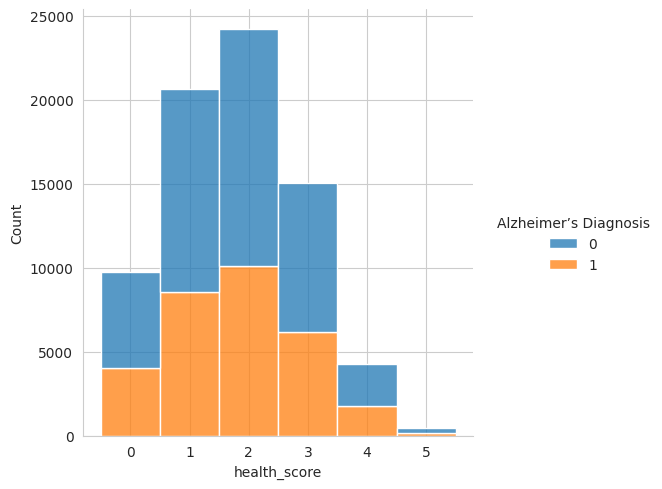

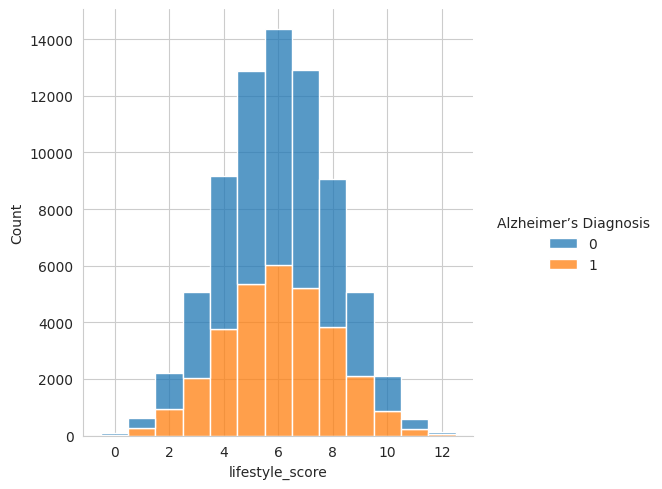

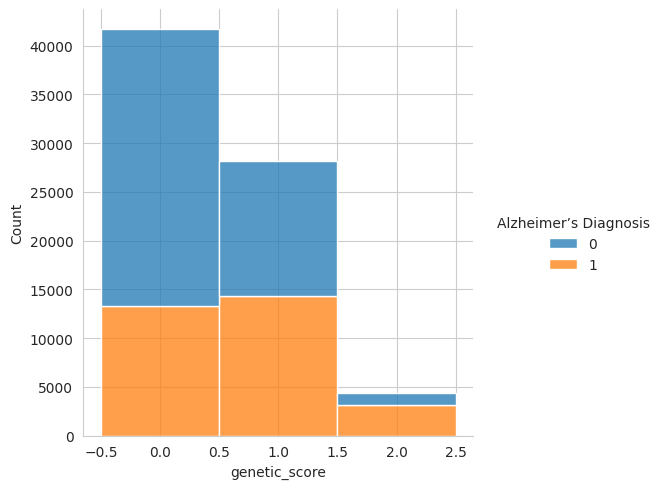

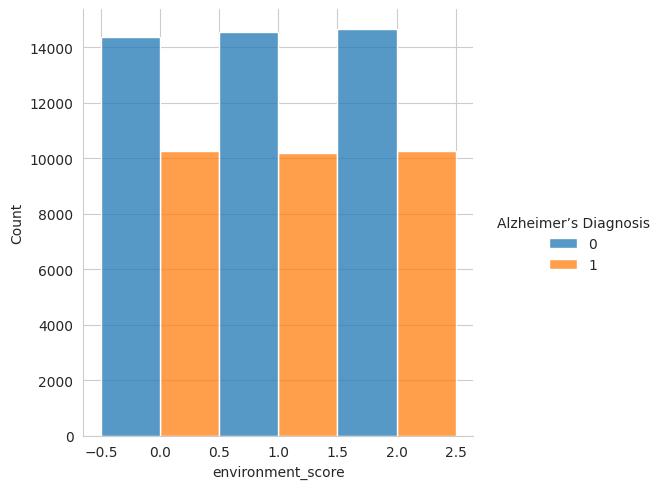

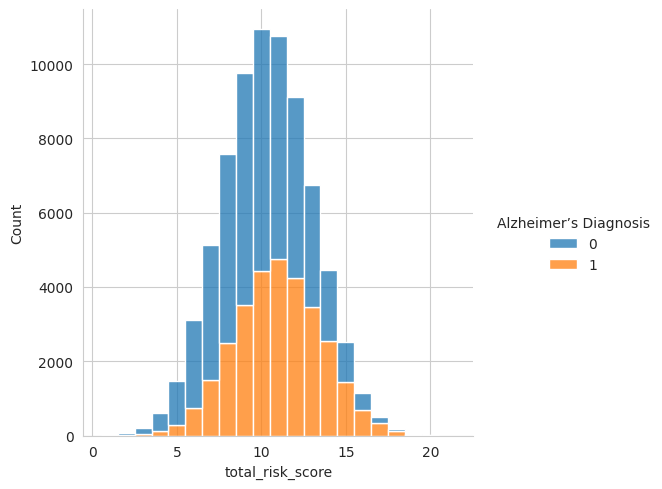

In [53]:
plt.figure(figsize=(8, 6))

# 單看各個群組與阿茲海默症的關係
sns.displot(data, x="Age", hue="Alzheimer’s Diagnosis", multiple="stack", discrete=True)
sns.displot(data, x="health_score", hue="Alzheimer’s Diagnosis", multiple="stack", discrete=True)
sns.displot(data, x="lifestyle_score", hue="Alzheimer’s Diagnosis", multiple="stack", discrete=True)
sns.displot(data, x="genetic_score", hue="Alzheimer’s Diagnosis", multiple="stack", discrete=True)
sns.displot(data, x="environment_score", hue="Alzheimer’s Diagnosis", multiple="dodge", discrete=True)

# 把上述群組合體後一起看
sns.displot(data, x="total_risk_score", hue="Alzheimer’s Diagnosis", multiple="stack", discrete=True)

plt.show()

**結論三：從後續分組資料來看，得出結論以下：此份數據顯示呈現常態分佈(大多數數值集中在中間，極端值較少)**

```python
第四步：使用標準差劃分風險：

```

In [54]:
mean_score = data["health_score"].mean()
std_score = data["health_score"].std()

# 用標準差劃分風險等級
def risk_category(score):
    if score < mean_score - std_score:
        return "低風險"
    elif score > mean_score + std_score:
        return "高風險"
    else:
        return "中等風險"

data["Health_score"] = data["health_score"].apply(risk_category)

print("以健康狀況分數來看：")
print(mean_score - std_score,",","低風險")
print(mean_score + std_score,",","高風險")

以健康狀況分數來看：
0.6803865012962984 , 低風險
2.9118755236623057 , 高風險


In [44]:
mean_score = data["lifestyle_score"].mean()
std_score = data["lifestyle_score"].std()

# 用標準差劃分風險等級
def risk_category(score):
    if score < mean_score - std_score:
        return "低風險"
    elif score > mean_score + std_score:
        return "高風險"
    else:
        return "中等風險"

data["Lifestyle_score"] = data["lifestyle_score"].apply(risk_category)

print("以生活習慣分數來看：")
print(mean_score - std_score,",","低風險")
print(mean_score + std_score,",","高風險")

以生活習慣分數來看：
3.988832032562488 , 低風險
7.988390212096451 , 高風險


In [45]:
mean_score = data["genetic_score"].mean()
std_score = data["genetic_score"].std()

# 用標準差劃分風險等級
def risk_category(score):
    if score < mean_score - std_score:
        return "低風險"
    elif score > mean_score + std_score:
        return "高風險"
    else:
        return "中等風險"

data["Genetic_score"] = data["genetic_score"].apply(risk_category)

print("以遺傳風險分數來看：")
print(mean_score - std_score,",","低風險")
print(mean_score + std_score,",","高風險")

以遺傳風險分數來看：
-0.10879554918553425 , 低風險
1.1050127186590344 , 高風險


In [46]:
mean_score = data["total_risk_score"].mean()
std_score = data["total_risk_score"].std()

# 用標準差劃分風險等級
def risk_category(score):
    if score < mean_score - std_score:
        return "低風險"
    elif score > mean_score + std_score:
        return "高風險"
    else:
        return "中等風險"

data["Risk Category"] = data["total_risk_score"].apply(risk_category)

print("以綜合分數來看：")
print(mean_score - std_score,",","低風險")
print(mean_score + std_score,",","高風險")

以綜合分數來看：
68.03645460403172 , 低風險
94.46538296311016 , 高風險


Axes(0.125,0.11;0.62x0.77)


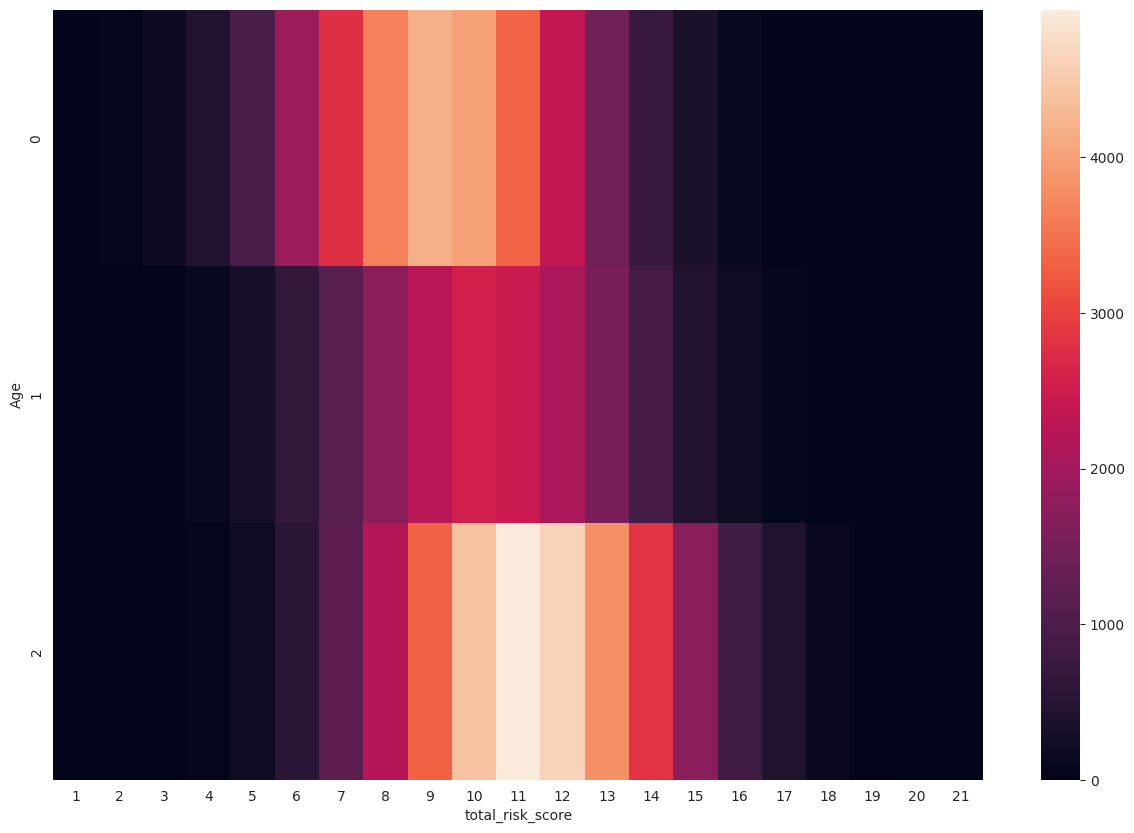

In [55]:
plt.figure(figsize=(15, 10))
n1 = data.groupby(['Age','total_risk_score']).size().unstack(fill_value=0)
print(sns.heatmap(n1))

**分隔線**----------------------------------------------------------------------------------------------------------------

In [ ]:
# 審視全體資料用

data.head(3)

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,1,0,1,0,0,...,0,2,Retired,Single,0,Low,Medium,2,Urban,0
1,Argentina,72,Male,7,29.9,1,1,0,0,0,...,0,1,Unemployed,Widowed,0,High,Low,2,Urban,0
2,South Africa,86,Female,19,22.9,0,2,1,0,1,...,1,1,Employed,Single,0,Low,Medium,2,Rural,0


In [ ]:
# 檢查數量用

data['Smoking Status'].value_counts()

In [ ]:
data.groupby(['Alzheimer’s Diagnosis','Smoking Status']).size().unstack(fill_value=0)

Smoking Status,Current,Former,Never
Alzheimer’s Diagnosis,,,
0,14658,14467,14445
1,10257,10161,10295


In [ ]:
hotmax = data.groupby(['Alzheimer’s Diagnosis','Smoking Status']).size().unstack(fill_value=0)
sns.heatmap(hotmax, annot=True)

In [ ]:
n1_list = ["Age", "BMI", "Cognitive Test Score"]
data[n1_list]

,Age,BMI,Cognitive Test Score
0,90,33.0,90
1,72,29.9,65
2,86,22.9,43
3,53,31.2,81
4,58,30.0,49
...,...,...,...
74278,60,22.6,42
74279,58,30.6,42
74280,57,28.2,61
74281,73,29.0,97
